# Create The Classifier

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
hotornot = pd.read_csv('hotornot.csv')
hotornot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18164 entries, 0 to 18163
Data columns (total 20 columns):
SpotifyURI          18164 non-null object
Acousticness        18164 non-null float64
Danceability        18164 non-null float64
DurationMS          18164 non-null int64
DynamicRange        18164 non-null float64
Energy              18164 non-null float64
Explicit            18164 non-null int64
Instrumentalness    18164 non-null float64
Key                 18164 non-null int64
Liveness            18164 non-null float64
Loudness            18164 non-null float64
Mode                18164 non-null int64
Popularity          18164 non-null int64
ReleaseDate         18164 non-null object
Sections            18164 non-null int64
Speechiness         18164 non-null float64
Tempo               18164 non-null float64
TimeSignature       18164 non-null int64
Valence             18164 non-null float64
Hot                 18164 non-null int64
dtypes: float64(10), int64(8), object(2)
memory u

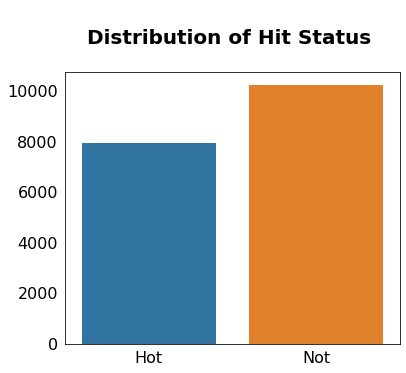

In [3]:
plt.figure(figsize=(6, 5))
Freq = sns.countplot(x = 'Hot', order = [1, 0], data = hotornot)

plt.title('\nDistribution of Hit Status \n', fontsize = 20, weight = 'bold')
plt.xlabel('')
plt.ylabel('')
plt.tick_params(labelsize = 16,
                bottom = False,
                left = False)
Freq.set_xticklabels(labels = ['Hot', 'Not'])

plt.show(Freq)

In [4]:
# Drop columns not helpful to the model
hotornot.drop(['SpotifyURI', 'ReleaseDate', 'Popularity'], axis = 1, inplace = True)

In [5]:
# Get dummies for categorical columns
Hits = pd.get_dummies(hotornot, columns = ['Explicit', 'Key', 'Mode', 'TimeSignature'],
                     drop_first = True,
                     prefix = ['Explicit', 'Key', 'Mode', 'TimeSignature'])

In [6]:
# In- and dependant variables
X = Hits.drop(['Hot'], axis = 1)
y = Hits['Hot']

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import scikitplot as skplt

In [8]:
# Split into test and train set 75:25
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 0)

In [9]:
# Scaled Version of the dataset
sc = MinMaxScaler()
X_train_s = sc.fit_transform(X_train)
X_test_s = sc.transform(X_test)

In [10]:
# UDF to show metrics for each model
def show_metrics(y_test, y_pred):
    '''
    Pass y_true and y_pred and print accuracy, precision, recall and f1 score.
    '''
    acc = round(accuracy_score(y_test, y_pred), 3)
    prec = round(precision_score(y_test, y_pred), 3)
    rec = round(recall_score(y_test, y_pred), 3)
    f1 = round(f1_score(y_test, y_pred), 3)
    
    print('Accuracy = {:.1%}'.format(acc))
    print('Precision = {:.1%}'.format(prec))
    print('Recall = {:.1%}'.format(rec))
    print('F1 score = {:.1%}'.format(f1))
    
def metrics_list(y_test, y_pred):
    '''
    Pass y_true and y_pred and return a list of metrics:
    accuracy, precision, recall and f1 score.
    '''
    
    acc = round(accuracy_score(y_test, y_pred), 3)
    prec = round(precision_score(y_test, y_pred), 3)
    rec = round(recall_score(y_test, y_pred), 3)
    f1 = round(f1_score(y_test, y_pred), 3)
    
    metrics = [acc, prec, rec, f1]
    
    return metrics

### Logistic Regression

In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
LR = LogisticRegression(max_iter = 10_000)
LR.fit(X_train_s, y_train)
LR_y_pred = LR.predict(X_test_s)

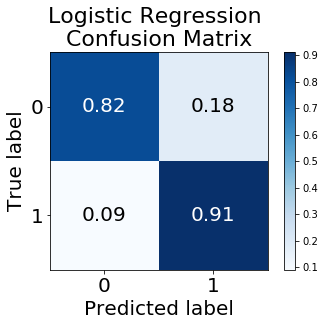

In [13]:
skplt.metrics.plot_confusion_matrix(
    y_test, LR_y_pred,
    normalize = True,
    figsize = (6, 4),
    title = 'Logistic Regression \nConfusion Matrix',
    text_fontsize = 20,
    title_fontsize = 22)
plt.ylim(1.5, -0.5)
#b += 0.5
#t -= 0.5
#plt.ylim(b, t)
plt.show()

In [14]:
show_metrics(y_test, LR_y_pred)

Accuracy = 85.7%
Precision = 79.3%
Recall = 91.0%
F1 score = 84.8%


### Support Vector Machine

In [15]:
from sklearn.svm import SVC

In [16]:
SVM = SVC(gamma = 0.2, kernel = 'rbf', random_state = 0)
SVM.fit(X_train_s, y_train)
SVM.score(X_test_s, y_test)
SVM_y_pred = SVM.predict(X_test_s)

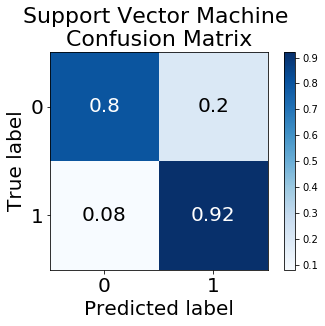

In [17]:
skplt.metrics.plot_confusion_matrix(
    y_test, SVM_y_pred,
    normalize = True,
    figsize = (6, 4),
    title = 'Support Vector Machine \nConfusion Matrix',
    text_fontsize = 20,
    title_fontsize = 22)
plt.ylim(1.5, -0.5)
#b += 0.5
#t -= 0.5
#plt.ylim(b, t)
plt.show()

In [18]:
show_metrics(y_test, SVM_y_pred)

Accuracy = 85.2%
Precision = 77.8%
Recall = 92.5%
F1 score = 84.5%


### Random Forest

In [19]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
#Random Forest
RF = RandomForestClassifier(random_state = 0)
RF.fit(X_train, y_train)
RF.score(X_test, y_test)
RF_y_pred = RF.predict(X_test)

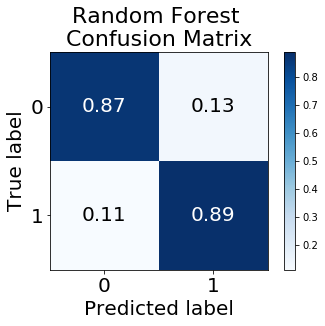

In [21]:
skplt.metrics.plot_confusion_matrix(
    y_test, RF_y_pred,
    normalize = True,
    figsize = (6, 4),
    title = 'Random Forest \nConfusion Matrix',
    text_fontsize = 20,
    title_fontsize = 22)
plt.ylim(1.5, -0.5)
#b += 0.5
#t -= 0.5
#plt.ylim(b, t)
plt.show()

In [22]:
show_metrics(y_test, RF_y_pred)

Accuracy = 87.6%
Precision = 84.0%
Recall = 88.6%
F1 score = 86.2%


In [23]:
Metrics = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector Machine', 'Random Forest'],
    'Accuracy' : [metrics_list(y_test, LR_y_pred)[0],
                  metrics_list(y_test, SVM_y_pred)[0],
                  metrics_list(y_test, RF_y_pred)[0]],             
    'Precision' : [metrics_list(y_test, LR_y_pred)[1],
                   metrics_list(y_test, SVM_y_pred)[1],
                   metrics_list(y_test, RF_y_pred)[1]],
    'Recall' : [metrics_list(y_test, LR_y_pred)[2],
                metrics_list(y_test, SVM_y_pred)[2],
                metrics_list(y_test, RF_y_pred)[2]],
    'F1_score' : [metrics_list(y_test, LR_y_pred)[3],
                  metrics_list(y_test, SVM_y_pred)[3],
                  metrics_list(y_test, RF_y_pred)[3]]})

In [24]:
print(Metrics)

                    Model  Accuracy  Precision  Recall  F1_score
0     Logistic Regression     0.857      0.793   0.910     0.848
1  Support Vector Machine     0.852      0.778   0.925     0.845
2           Random Forest     0.876      0.840   0.886     0.862


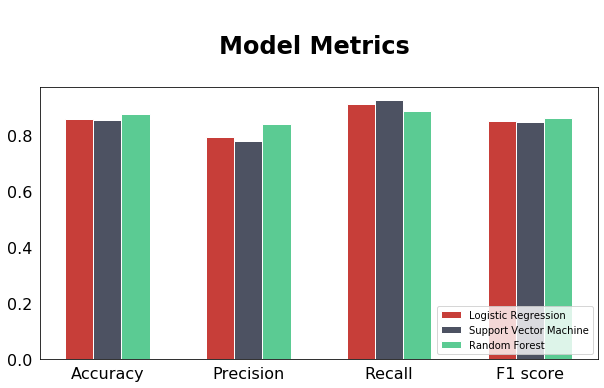

In [25]:
plt.figure(figsize = (10,5))
barWidth = 0.2

bars1 = Metrics.iloc[0, :].tolist()[1:5]
bars2 = Metrics.iloc[1, :].tolist()[1:5]
bars3 = Metrics.iloc[2, :].tolist()[1:5]

r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

plt.bar(r1, bars1, width = barWidth, color = '#c73e39', edgecolor = 'white', label = 'Logistic Regression')
plt.bar(r2, bars2, width = barWidth, color = '#4d5262', edgecolor = 'white', label = 'Support Vector Machine')
plt.bar(r3, bars3, width = barWidth, color = '#5bcb93', edgecolor = 'white', label = 'Random Forest')

plt.title('\nModel Metrics \n', fontsize = 24, weight = 'bold')
plt.xticks([r + barWidth for r in range(len(bars1))],
           ['Accuracy', 'Precision', 'Recall', 'F1 score'])
plt.tick_params(labelsize = 16,
                bottom = False,
                left = False)
 
plt.legend(loc = 'lower right', prop = {'size': 10})
plt.show()